In [1]:
import pandas as pd
#importiert pandas
import numpy as np
#importiert numpy
import matplotlib.pyplot as plt
#importier nur pyplot von matplotlib
from statistics import stdev
from scipy import stats
import random
import seaborn as sb
import os, os.path
import math
%matplotlib inline

In [2]:
#constant values
DATA_DIRECTORY_LOW_CONTRAST = '..\\Daten_niedriger_kontrast\\'
#constant values
DATA_DIRECTORY_HIGH_CONTRAST = '..\\Daten_hoher_kontrast\\'

In [3]:
proband_directories_low_contrast = [name for name in os.listdir(DATA_DIRECTORY_LOW_CONTRAST) if (os.path.isdir(os.path.join(DATA_DIRECTORY_LOW_CONTRAST, name))) & ('proband' in name)]
all_proband_dataframe_dict_low_contrast = {}
for i in range(len(proband_directories_low_contrast)):
    proband_name = proband_directories_low_contrast[i].split('_')[1]
    proband_files = [name for name in os.listdir(os.path.join(DATA_DIRECTORY_LOW_CONTRAST, proband_directories_low_contrast[i])) if (os.path.isfile(os.path.join(DATA_DIRECTORY_LOW_CONTRAST, proband_directories_low_contrast[i], name)) & ('.dat' in name))]
    dataframe_dict = {}
    for file in proband_files:
        dataframe_dict[file] = pd.read_table(os.path.join(DATA_DIRECTORY_LOW_CONTRAST, proband_directories_low_contrast[i], file), sep=', ', engine='python')
    all_proband_dataframe_dict_low_contrast[proband_name] = dataframe_dict

In [4]:
proband_directories_high_contrast = [name for name in os.listdir(DATA_DIRECTORY_HIGH_CONTRAST) if (os.path.isdir(os.path.join(DATA_DIRECTORY_HIGH_CONTRAST, name))) & ('proband' in name)]
all_proband_dataframe_dict_high_contrast = {}
for i in range(len(proband_directories_high_contrast)):
    proband_name = proband_directories_high_contrast[i].split('_')[1]
    proband_files = [name for name in os.listdir(os.path.join(DATA_DIRECTORY_HIGH_CONTRAST, proband_directories_high_contrast[i])) if (os.path.isfile(os.path.join(DATA_DIRECTORY_HIGH_CONTRAST, proband_directories_high_contrast[i], name)) & ('.dat' in name))]
    dataframe_dict = {}
    for file in proband_files:
        dataframe_dict[file] = pd.read_table(os.path.join(DATA_DIRECTORY_HIGH_CONTRAST, proband_directories_high_contrast[i], file), sep=', ', engine='python')
    all_proband_dataframe_dict_high_contrast[proband_name] = dataframe_dict

In [5]:
for proband in all_proband_dataframe_dict_low_contrast:
    for file_name in all_proband_dataframe_dict_low_contrast[proband]:
        td_2 = all_proband_dataframe_dict_low_contrast[proband][file_name]
        td_2["Kreis"] = 360
        #Spalte 'Kreis' eingefügt, da der absolute Wert '360' in Formel nicht angenommen wurde

        td_2["delta_fg_bg"] = np.zeros((64,))

        for j in range(td_2['bg'].shape[0]):
            dist = td_2['fg'][j] - td_2['bg'][j];
            if(dist * np.sign(dist) > 180):
                dist = dist - 360 * np.sign(dist)
            td_2.loc[j, "delta_fg_bg"] = dist
        all_proband_dataframe_dict_low_contrast[proband][file_name] = td_2

In [6]:
for proband in all_proband_dataframe_dict_high_contrast:
    for file_name in all_proband_dataframe_dict_high_contrast[proband]:
        td_2 = all_proband_dataframe_dict_high_contrast[proband][file_name]
        td_2["Kreis"] = 360
        #Spalte 'Kreis' eingefügt, da der absolute Wert '360' in Formel nicht angenommen wurde

        td_2["delta_fg_bg"] = np.zeros((64,))

        for j in range(td_2['bg'].shape[0]):
            dist = td_2['fg'][j] - td_2['bg'][j];
            if(dist * np.sign(dist) > 180):
                dist = dist - 360 * np.sign(dist)
            td_2.loc[j, "delta_fg_bg"] = dist
        all_proband_dataframe_dict_high_contrast[proband][file_name] = td_2

In [7]:
for proband in all_proband_dataframe_dict_low_contrast:
    for file_name in all_proband_dataframe_dict_low_contrast[proband]:
        td_2 = all_proband_dataframe_dict_low_contrast[proband][file_name]
        td_2["delta_phi"] = np.zeros((64,))

        for j in range(td_2['phi'].shape[0]):
            dist = td_2['phi'][j] - td_2['fg'][j];
            if(dist * np.sign(dist) > 180):
                dist = dist - 360 * np.sign(dist)
            td_2.loc[j, "delta_phi"] = dist
        all_proband_dataframe_dict_low_contrast[proband][file_name] = td_2

In [8]:
for proband in all_proband_dataframe_dict_high_contrast:
    for file_name in all_proband_dataframe_dict_high_contrast[proband]:
        td_2 = all_proband_dataframe_dict_high_contrast[proband][file_name]
        td_2["delta_phi"] = np.zeros((64,))

        for j in range(td_2['phi'].shape[0]):
            dist = td_2['phi'][j] - td_2['fg'][j];
            if(dist * np.sign(dist) > 180):
                dist = dist - 360 * np.sign(dist)
            td_2.loc[j, "delta_phi"] = dist
        all_proband_dataframe_dict_high_contrast[proband][file_name] = td_2

In [9]:
all_proband_delta_fg_bg_values_dict_low_contrast = {}
all_proband_mean_values_dict_low_contrast = {}
all_proband_stand_error_dict_low_contrast = {}
for proband in all_proband_dataframe_dict_low_contrast:
    delta_fg_bg_values_dict = {}
    mean_values_dict = {}
    stand_error_dict = {}
    for file_name in all_proband_dataframe_dict_low_contrast[proband]:  
    #In the end, mean_values at position i is the mean value corresponding to delta_fg_bg_values at position i
        td_2 = all_proband_dataframe_dict_low_contrast[proband][file_name]
        delta_fg_bg_set = set(td_2['delta_fg_bg'])
        delta_fg_bg_values = list(delta_fg_bg_set)
        list_with_delta_phi_values = []
        for j in delta_fg_bg_values:
            indices_with_same_delta_fg_bg = np.where(td_2['delta_fg_bg'] == j)
            sublist_with_delta_phi_values = []
            for index in indices_with_same_delta_fg_bg[0]:
                sublist_with_delta_phi_values.append(td_2.loc[index, 'delta_phi'])
            list_with_delta_phi_values.append(sublist_with_delta_phi_values)

        #This section is necessary, because single columns (of the matrix where we want to extract
        #the mean value of each column) have different lengths. np.mean for axis = 1 cannot handle
        #different lengths along axis = 1, therefore each column mean hasy to be calculated on it's own
        mean_values = np.zeros(len(list_with_delta_phi_values))
        stand_error = np.zeros(len(list_with_delta_phi_values))
        for j in range(len(list_with_delta_phi_values)):
            mean_values[j] = np.mean(list_with_delta_phi_values[j])
            stand_error[j] = stats.sem(list_with_delta_phi_values[j])
        print(mean_values)
        delta_fg_bg_values_dict[file_name] = delta_fg_bg_values
        mean_values_dict[file_name] = mean_values
        stand_error_dict[file_name] = stand_error
    all_proband_delta_fg_bg_values_dict_low_contrast[proband] = delta_fg_bg_values_dict
    all_proband_mean_values_dict_low_contrast[proband] = mean_values_dict
    all_proband_stand_error_dict_low_contrast[proband] = stand_error_dict

[  8.9714625  -1.6136625 -10.319365   -2.991325    5.3499     -2.351875
  13.819325    2.735075 ]
[-1.428125   -5.4497125   4.72842625  2.0057     11.54421375 -4.9923325
  6.49325     1.0333875   3.1487625 ]
[  0.20415     7.5517875 -13.631625   -4.6387      6.2991625  -1.0494875
   5.4675625   4.4186   ]
[-4.9309625  -3.322625    2.4719725   2.230825   11.52689875 -9.3746375
  6.01375    -0.3965625   7.342925  ]
[13.4771875 -0.6943375 -5.9663375  1.6733     3.0767375  5.2831
  3.86665   -8.2153375]
[ 0.32690125 -6.1531125   4.6058125  -0.5799535  13.67575    -8.294075
  2.553      -1.314675    7.89489125]
[ 7.227875   -0.2078125  -8.7850375  -6.93199875 -1.4612375   2.5613125
  5.337525    2.6156125 ]
[-3.845625  -4.7383375  3.522725  -1.6021075  7.336375  -2.9761
  1.3005     1.1636625  8.5728975]
[ 14.1349375  -1.6116    -13.401475  -13.4580125   8.0852     -5.2950625
  13.727425   11.8069875]
[ -2.3507625   -7.7496625    6.59530125   0.320525    16.10327625
 -15.62795      0.857   

In [10]:
all_proband_delta_fg_bg_values_dict_high_contrast = {}
all_proband_mean_values_dict_high_contrast = {}
all_proband_stand_error_dict_high_contrast = {}
for proband in all_proband_dataframe_dict_high_contrast:
    delta_fg_bg_values_dict = {}
    mean_values_dict = {}
    stand_error_dict = {}
    for file_name in all_proband_dataframe_dict_high_contrast[proband]:  
    #In the end, mean_values at position i is the mean value corresponding to delta_fg_bg_values at position i
        td_2 = all_proband_dataframe_dict_high_contrast[proband][file_name]
        delta_fg_bg_set = set(td_2['delta_fg_bg'])
        delta_fg_bg_values = list(delta_fg_bg_set)
        list_with_delta_phi_values = []
        for j in delta_fg_bg_values:
            indices_with_same_delta_fg_bg = np.where(td_2['delta_fg_bg'] == j)
            sublist_with_delta_phi_values = []
            for index in indices_with_same_delta_fg_bg[0]:
                sublist_with_delta_phi_values.append(td_2.loc[index, 'delta_phi'])
            list_with_delta_phi_values.append(sublist_with_delta_phi_values)

        #This section is necessary, because single columns (of the matrix where we want to extract
        #the mean value of each column) have different lengths. np.mean for axis = 1 cannot handle
        #different lengths along axis = 1, therefore each column mean hasy to be calculated on it's own
        mean_values = np.zeros(len(list_with_delta_phi_values))
        stand_error = np.zeros(len(list_with_delta_phi_values))
        for j in range(len(list_with_delta_phi_values)):
            mean_values[j] = np.mean(list_with_delta_phi_values[j])
            stand_error[j] = stats.sem(list_with_delta_phi_values[j])
        print(mean_values)
        delta_fg_bg_values_dict[file_name] = delta_fg_bg_values
        mean_values_dict[file_name] = mean_values
        stand_error_dict[file_name] = stand_error
    all_proband_delta_fg_bg_values_dict_high_contrast[proband] = delta_fg_bg_values_dict
    all_proband_mean_values_dict_high_contrast[proband] = mean_values_dict
    all_proband_stand_error_dict_high_contrast[proband] = stand_error_dict

[-0.674225    5.0167625  -8.69772125 -2.15484125  3.06025     9.0844875
  2.5743875  -6.2569875 ]
[12.298125   -1.2494375  -6.2245625  -5.4231625   4.6176875   2.7659125
  5.643975   -5.15744125]
[ 6.84621250e+00 -1.85000000e-03 -1.01372675e+01  4.11845000e+00
 -1.83646250e+00  7.06583750e+00  1.73633750e+00 -8.48642500e+00]
[11.7616875  0.9492875 -5.6992    -5.3524375 -1.938175   3.91695
  5.8846625  1.8497125]
[-0.146725  -4.1604875  3.4702625  0.647165   4.1467875 -7.3681625
  1.1455    -0.462025   5.5364575]
[-1.2905125 -5.2191     2.83563    0.35415    8.85835   -4.72235
  0.49775   -1.764025   3.9332125]
[-4.5906725  -0.663       2.625125    0.16611575  7.6829125  -3.2679125
  5.49225     1.3745      6.50008875]
[-2.1941     -3.671375    5.30444875  1.3299      9.00579875 -6.776625
  2.12475    -1.340545    2.9985625 ]
[ -0.2742125    5.8406     -14.56122865  -4.3370625    8.315675
  11.2028375    2.28895     -8.4696    ]
[ 14.7382625   3.92815    -9.3980625  -4.7681625   7.44002

In [11]:
print(stand_error)

[2.09957549 2.39046559 2.82226152 3.20944845 3.53375468 3.14146803
 2.3586062  2.16807257 3.04558831]


In [12]:
#list(all_proband_dataframe_dict[list(all_proband_dataframe_dict.items())[0][0]].items())[0][1]
column_names_low_contrast = (list(all_proband_dataframe_dict_low_contrast[list(all_proband_dataframe_dict_low_contrast.items())[0][0]].items())[0][1].columns.values)
#column_names
all_proband_data_single_dataframe_low_contrast = pd.DataFrame(columns=column_names_low_contrast)

for proband in all_proband_dataframe_dict_low_contrast:
    for file_name in all_proband_dataframe_dict_low_contrast[proband]:
        all_proband_data_single_dataframe_low_contrast = pd.concat([all_proband_data_single_dataframe_low_contrast, all_proband_dataframe_dict_low_contrast[proband][file_name]], ignore_index=True)

In [13]:
#list(all_proband_dataframe_dict[list(all_proband_dataframe_dict.items())[0][0]].items())[0][1]
column_names_high_contrast = (list(all_proband_dataframe_dict_high_contrast[list(all_proband_dataframe_dict_high_contrast.items())[0][0]].items())[0][1].columns.values)
#column_names
all_proband_data_single_dataframe_high_contrast = pd.DataFrame(columns=column_names_high_contrast)

for proband in all_proband_dataframe_dict_high_contrast:
    for file_name in all_proband_dataframe_dict_high_contrast[proband]:
        all_proband_data_single_dataframe_high_contrast = pd.concat([all_proband_data_single_dataframe_high_contrast, all_proband_dataframe_dict_high_contrast[proband][file_name]], ignore_index=True)

In [14]:
hue_shift_for_background_delta_fg_bg_dict_low_contrast = {}
hue_shift_for_background_delta_phi_mean_dict_low_contrast = {}
hue_shift_for_background_delta_phi_sem_dict_low_contrast = {}
for bg_value in all_proband_data_single_dataframe_low_contrast['bg'].unique():
    indices_with_same_bg = np.where(all_proband_data_single_dataframe_low_contrast['bg'] == bg_value)
    list_with_delta_fg_bg = []
    list_with_delta_phi = []
    for index in indices_with_same_bg[0]:
        list_with_delta_fg_bg.append(all_proband_data_single_dataframe_low_contrast.loc[index, 'delta_fg_bg'])
        list_with_delta_phi.append(all_proband_data_single_dataframe_low_contrast.loc[index, 'delta_phi'])
    delta_fg_bg_values = []
    delta_phi_mean_values = []
    delta_phi_sem_values = []
    for delta_fg_bg_value in list(set(list_with_delta_fg_bg)):
        indices_with_same_delta_fg_bg = np.where(list_with_delta_fg_bg == delta_fg_bg_value)
        delta_phi_values = []
        for index in indices_with_same_delta_fg_bg[0]:
            delta_phi_values.append(list_with_delta_phi[index])
        delta_phi_mean = np.mean(delta_phi_values)
        delta_phi_sem = stats.sem(delta_phi_values)
        
        delta_fg_bg_values.append(delta_fg_bg_value)
        delta_phi_mean_values.append(delta_phi_mean)
        delta_phi_sem_values.append(delta_phi_sem)
    
    hue_shift_for_background_delta_fg_bg_dict_low_contrast[bg_value] = delta_fg_bg_values
    hue_shift_for_background_delta_phi_mean_dict_low_contrast[bg_value] = delta_phi_mean_values
    hue_shift_for_background_delta_phi_sem_dict_low_contrast[bg_value] = delta_phi_sem_values   
    
    
    
    #hue_shift_for_background_dict[bg_value] = list_with_delta_fg_bg_and_delta_phi

In [15]:
hue_shift_for_background_delta_fg_bg_dict_high_contrast = {}
hue_shift_for_background_delta_phi_mean_dict_high_contrast = {}
hue_shift_for_background_delta_phi_sem_dict_high_contrast = {}
for bg_value in all_proband_data_single_dataframe_high_contrast['bg'].unique():
    indices_with_same_bg = np.where(all_proband_data_single_dataframe_high_contrast['bg'] == bg_value)
    list_with_delta_fg_bg = []
    list_with_delta_phi = []
    for index in indices_with_same_bg[0]:
        list_with_delta_fg_bg.append(all_proband_data_single_dataframe_high_contrast.loc[index, 'delta_fg_bg'])
        list_with_delta_phi.append(all_proband_data_single_dataframe_high_contrast.loc[index, 'delta_phi'])
    delta_fg_bg_values = []
    delta_phi_mean_values = []
    delta_phi_sem_values = []
    for delta_fg_bg_value in list(set(list_with_delta_fg_bg)):
        indices_with_same_delta_fg_bg = np.where(list_with_delta_fg_bg == delta_fg_bg_value)
        delta_phi_values = []
        for index in indices_with_same_delta_fg_bg[0]:
            delta_phi_values.append(list_with_delta_phi[index])
        delta_phi_mean = np.mean(delta_phi_values)
        delta_phi_sem = stats.sem(delta_phi_values)
        
        delta_fg_bg_values.append(delta_fg_bg_value)
        delta_phi_mean_values.append(delta_phi_mean)
        delta_phi_sem_values.append(delta_phi_sem)
    
    hue_shift_for_background_delta_fg_bg_dict_high_contrast[bg_value] = delta_fg_bg_values
    hue_shift_for_background_delta_phi_mean_dict_high_contrast[bg_value] = delta_phi_mean_values
    hue_shift_for_background_delta_phi_sem_dict_high_contrast[bg_value] = delta_phi_sem_values   
    
    
    
    #hue_shift_for_background_dict[bg_value] = list_with_delta_fg_bg_and_delta_phi

BG Value:0


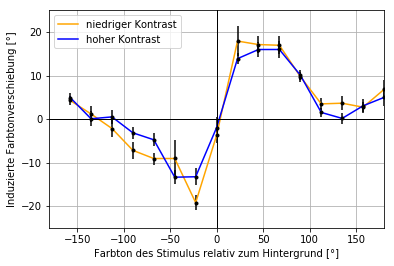

BG Value:45


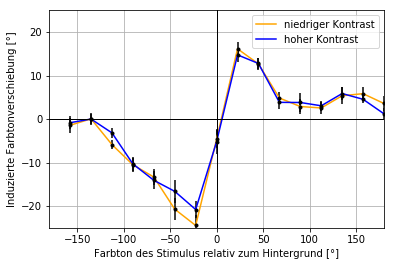

BG Value:90


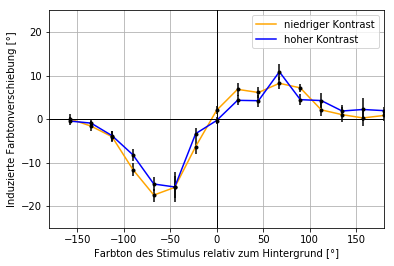

BG Value:135


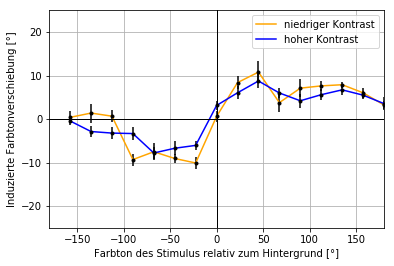

BG Value:180


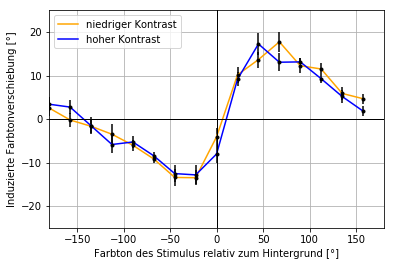

BG Value:225


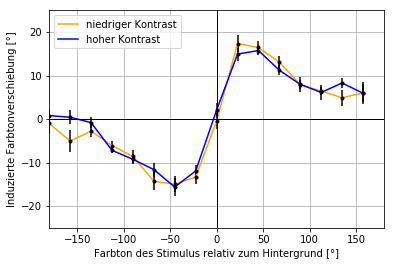

BG Value:270


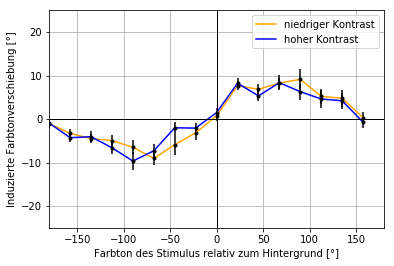

BG Value:315


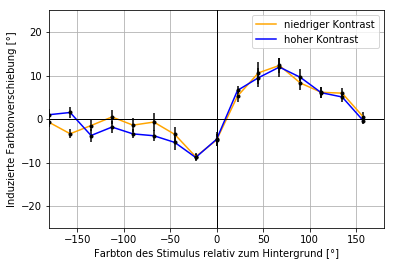

In [16]:
#Falls ein Wert fehlt ist er in low_contrast, aber nicht in high_contrash, hier potentieller Fehler
for bg_value in sorted(all_proband_data_single_dataframe_low_contrast['bg'].unique()):
    print('BG Value:' + str(bg_value))

    x_low_contrast = hue_shift_for_background_delta_fg_bg_dict_low_contrast[bg_value]
    x_copy_low_contrast = x_low_contrast
    y_low_contrast = hue_shift_for_background_delta_phi_mean_dict_low_contrast[bg_value]
    sem_low_contrast = hue_shift_for_background_delta_phi_sem_dict_low_contrast[bg_value]
    
    x_low_contrast, y_low_contrast = zip(*sorted(zip(x_low_contrast, y_low_contrast)))
    x_copy_low_contrast, sem_low_contrast = zip(*sorted(zip(x_copy_low_contrast, sem_low_contrast)))
    
    x_high_contrast = hue_shift_for_background_delta_fg_bg_dict_high_contrast[bg_value]
    x_copy_high_contrast = x_high_contrast
    y_high_contrast = hue_shift_for_background_delta_phi_mean_dict_high_contrast[bg_value]
    sem_high_contrast = hue_shift_for_background_delta_phi_sem_dict_high_contrast[bg_value]
    
    x_high_contrast, y_high_contrast = zip(*sorted(zip(x_high_contrast, y_high_contrast)))
    x_copy_high_contrast, sem_high_contrast = zip(*sorted(zip(x_copy_high_contrast, sem_high_contrast)))
    
    plt.errorbar(x_low_contrast, y_low_contrast, yerr=sem_low_contrast, fmt='.k')
    plt.errorbar(x_high_contrast, y_high_contrast, yerr=sem_high_contrast, fmt='.k')
    plt.plot(x_low_contrast, y_low_contrast, color = 'orange', label = 'niedriger Kontrast')
    plt.plot(x_high_contrast, y_high_contrast, color = 'blue', label = 'hoher Kontrast')
    plt.legend(loc='best')

    ##################################
    plt.xlabel('Farbton des Stimulus relativ zum Hintergrund [°]')
    plt.ylabel('Induzierte Farbtonverschiebung [°]')
    plt.axhline(0, color= 'black', lw=1)
    plt.axvline(0, color= 'black', lw=1)
    plt.axis([-180, 180, -25, 25])
    plt.grid(True)
    plt.show()

In [17]:
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as FF
import scipy


for bg_value in sorted(all_proband_data_single_dataframe_low_contrast['bg'].unique()):
    print('; Hintergrund:' + str(bg_value) + '°')
        
    x_low_contrast = hue_shift_for_background_delta_fg_bg_dict_low_contrast[bg_value]
    y_low_contrast = hue_shift_for_background_delta_phi_mean_dict_low_contrast[bg_value]

    x_low_contrast, y_low_contrast = zip(*sorted(zip(x_low_contrast, y_low_contrast)))
        
    x_high_contrast = hue_shift_for_background_delta_fg_bg_dict_high_contrast[bg_value]
    y_high_contrast = hue_shift_for_background_delta_phi_mean_dict_high_contrast[bg_value]
    
    x_high_contrast, y_high_contrast = zip(*sorted(zip(x_high_contrast, y_high_contrast)))
        
    
    twosample_results = scipy.stats.ttest_ind(y_low_contrast, y_high_contrast)
        
    print(twosample_results)

; Hintergrund:0°
Ttest_indResult(statistic=-0.022293863202792464, pvalue=0.9823611702235786)
; Hintergrund:45°
Ttest_indResult(statistic=-0.09826784233988473, pvalue=0.9223732657517366)
; Hintergrund:90°
Ttest_indResult(statistic=-0.20398339108555053, pvalue=0.8397439474318913)
; Hintergrund:135°
Ttest_indResult(statistic=0.080912796030072, pvalue=0.936048697103252)
; Hintergrund:180°
Ttest_indResult(statistic=0.1165379443850432, pvalue=0.908002875955423)
; Hintergrund:225°
Ttest_indResult(statistic=-0.20048197133504353, pvalue=0.8424566044615621)
; Hintergrund:270°
Ttest_indResult(statistic=0.11513344479174772, pvalue=0.9091065303092598)
; Hintergrund:315°
Ttest_indResult(statistic=0.1659233000802717, pvalue=0.8693304784054869)


In [18]:
#alte berechnung. läuft über ganze kurve, falls es tatsächlich so funkt, wie ich denke


for bg_value in sorted(all_proband_data_single_dataframe_low_contrast['bg'].unique()):
    print('; Hintergrund:' + str(bg_value) + '°')
        
    y_low_contrast = hue_shift_for_background_delta_phi_mean_dict_low_contrast[bg_value]
        
    y_high_contrast = hue_shift_for_background_delta_phi_mean_dict_high_contrast[bg_value]
    
    
    twosample_results = scipy.stats.ttest_ind(y_low_contrast, y_high_contrast)
        
    print(twosample_results)

; Hintergrund:0°
Ttest_indResult(statistic=-0.022293863202792853, pvalue=0.9823611702235783)
; Hintergrund:45°
Ttest_indResult(statistic=-0.09826784233988473, pvalue=0.9223732657517366)
; Hintergrund:90°
Ttest_indResult(statistic=-0.20398339108555047, pvalue=0.8397439474318913)
; Hintergrund:135°
Ttest_indResult(statistic=0.0809127960300721, pvalue=0.9360486971032519)
; Hintergrund:180°
Ttest_indResult(statistic=0.11653794438504313, pvalue=0.9080028759554231)
; Hintergrund:225°
Ttest_indResult(statistic=-0.20048197133504353, pvalue=0.8424566044615621)
; Hintergrund:270°
Ttest_indResult(statistic=0.11513344479174786, pvalue=0.9091065303092597)
; Hintergrund:315°
Ttest_indResult(statistic=0.1659233000802717, pvalue=0.8693304784054869)


In [19]:
for bg_value in sorted(all_proband_data_single_dataframe_low_contrast['bg'].unique()):
    print('; Hintergrund:' + str(bg_value) + '°')
        
    y_low_contrast = hue_shift_for_background_delta_phi_mean_dict_low_contrast[bg_value]
        
    y_high_contrast = hue_shift_for_background_delta_phi_mean_dict_high_contrast[bg_value]


    chi = scipy.stats.chisquare(y_low_contrast, y_high_contrast)
    print(chi)

; Hintergrund:0°
Power_divergenceResult(statistic=295.96761258921066, pvalue=3.8466038302761656e-54)
; Hintergrund:45°
Power_divergenceResult(statistic=366.36562821151307, pvalue=7.887395258657461e-69)
; Hintergrund:90°
Power_divergenceResult(statistic=-161.2325454336368, pvalue=1.0)
; Hintergrund:135°
Power_divergenceResult(statistic=-24.855232685094137, pvalue=1.0)
; Hintergrund:180°
Power_divergenceResult(statistic=43.42522035613017, pvalue=0.00013521235671879513)
; Hintergrund:225°
Power_divergenceResult(statistic=459.9029488741809, pvalue=1.675880234641323e-88)
; Hintergrund:270°
Power_divergenceResult(statistic=-70.4227549956926, pvalue=1.0)
; Hintergrund:315°
Power_divergenceResult(statistic=28.467876702912946, pvalue=0.018817199693443504)
